# Taller Representación Numérica, Errores y estabilidad.

## mybin
Escriba una función que se llame `mybin` que reciba un número entero real de 16 bits y realice su conversión en código binario, compare su resultado con `bin(4321)`

In [5]:
def mybin(num):
    """
    Convierte un número entero de 16 bits a su representación binaria.

    Args:
        num (int): Número entero a convertir (se asume de 16 bits)

    Returns:
        str: Cadena que representa el número en binario, con prefijo '0b'
    """
    # Verificar si el número está dentro del rango de 16 bits
    if num <- 2**16 or num > 2**16 -1:
        raise ValueError("El número debe estar en el rango de 16 bits (-32768 a 32767)")

    # Manejar el caso de números negativos
    sign='-' if num <0 else ''
    num=abs(num)

    # Convertir a binario manualmente
    binary = []
    while num>0:
      binary.append(str(num%2))
      num=num//2
    # Invertir el orden de los bits
    binary.reverse()
    result =sign+ '0b' + ''.join(binary)

    return result

# Probar la función con 4321 y comparar con bin(4321)
numero = 4321
mi_resultado = mybin(numero)
python_resultado = bin(numero)

print(f"mybin({numero}): {mi_resultado}")
print(f"bin({numero}):   {python_resultado}")

mybin(4321): 0b1000011100001
bin(4321):   0b1000011100001


## Serie $S_N$

Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
$$
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
$$

- Sumando números pares e impares.

$$
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
$$

- Combinando las series de una forma analítica

$$
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
$$



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados númericos  pueden tener diferencias.


- Escribir tres funciones para que realicen el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$


- Estudiar la convergencia de la serie para los tres casos.


- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $$E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|,$$ $i = 1, 2$. Considere valores de $N = 1\times 10^{6}$.


In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def S1(N):
    total = 0.0
    for n in range(1, 2*N + 1):
        term = (-1)**n * n / (n + 1)
        total += term
    return total

In [8]:
def S2(N):
    sum_odd = 0.0  # Términos impares (negativos)
    sum_even = 0.0  # Términos pares (positivos)
    for n in range(1, N + 1):
        sum_odd += (2*n - 1) / (2*n)
        sum_even += (2*n) / (2*n + 1)
    return -sum_odd + sum_even

In [9]:
def S3(N):
    total = 0.0
    for n in range(1, N + 1):
        term = 1 / (2*n * (2*n + 1))
        total += term
    return total

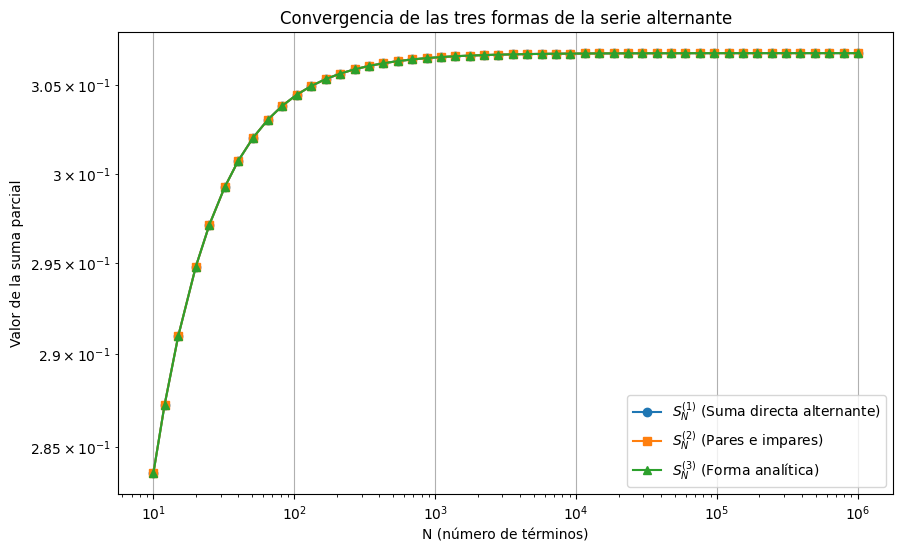

In [10]:
# Valores de N (logarítmicamente espaciados)
N_values = np.logspace(1, 6, num=50, dtype=int)

# Calculamos las sumas para cada N
S1_values = [S1(N) for N in N_values]
S2_values = [S2(N) for N in N_values]
S3_values = [S3(N) for N in N_values]

# Gráfico de convergencia
plt.figure(figsize=(10, 6))
plt.loglog(N_values, S1_values, 'o-', label='$S_N^{(1)}$ (Suma directa alternante)')
plt.loglog(N_values, S2_values, 's-', label='$S_N^{(2)}$ (Pares e impares)')
plt.loglog(N_values, S3_values, '^-', label='$S_N^{(3)}$ (Forma analítica)')
plt.xlabel('N (número de términos)')
plt.ylabel('Valor de la suma parcial')
plt.title('Convergencia de las tres formas de la serie alternante')
plt.legend()
plt.grid()
plt.show()

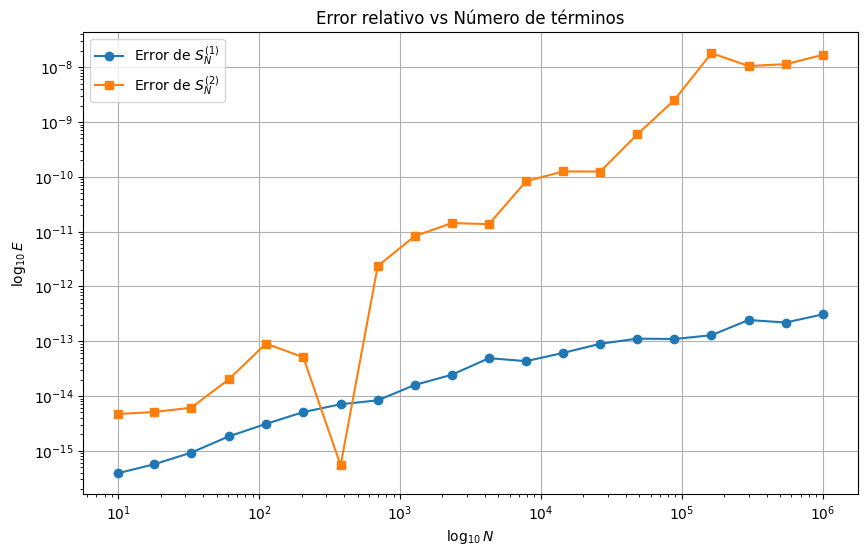

In [11]:
N_values = np.logspace(1, 6, 20, dtype=int)  # Valores de N desde 10^1 hasta 10^6
E1 = []
E2 = []

for N in N_values:
    s1 = S1(N)
    s2 = S2(N)
    s3 = S3(N)
    E1.append(abs((s1 - s3)/s3))
    E2.append(abs((s2 - s3)/s3))

plt.figure(figsize=(10, 6))
plt.loglog(N_values, E1, 'o-', label=r'Error de $S_N^{(1)}$')
plt.loglog(N_values, E2, 's-', label=r'Error de $S_N^{(2)}$')
plt.xlabel(r'$\log_{10} N$')
plt.ylabel(r'$\log_{10} E$')
plt.legend()
plt.grid()
plt.title('Error relativo vs Número de términos')
plt.show()

## Serie Seno

Considere la serie de Taylor para el seno

$$\sin(x) = \sum^{\infty}_{n=0} (-1)^{n}\frac{x^{2n+1}}{(2n+1)!} $$

- Defina una función que a partir de la *serie de Taylor* y un valor de $x$ en radianes encuentre el valor de $\sin(x)$.


- Usando $x$ como `float32` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.


- Ahora, usando $x$ como `float64` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.


- Describa los errores porcentuales para cada cálculo y por qué pueden existir diferencias.

In [12]:
import math

def sin_taylor(x, tolerance, max_terms=1000):
    """
    Calcula sin(x) usando la serie de Taylor hasta que el error absoluto sea menor que 'tolerance'
    o se alcance 'max_terms'.
    
    Args:
        x: Valor en radianes (puede ser float32 o float64).
        tolerance: Tolerancia para la convergencia (épsilon de la máquina).
        max_terms: Número máximo de términos a evaluar (por defecto 1000).
    
    Returns:
        sin_approx: Aproximación de sin(x).
        n_terms: Número de términos usados.
    """
    sin_approx = 0.0
    for n in range(max_terms):
        term = ((-1)**n)*(x**(2*n+1)) / math.factorial(2*n+1)
        sin_approx += term
        
        # Verificar convergencia
        if abs(term) < tolerance:
            return sin_approx, n + 1  # n+1 porque empezamos en n=0
    
    return sin_approx, max_terms



In [13]:

x_float32 = np.float32(5.0)  # Probamos con x = 1.0 radianes
epsilon_float32 = np.finfo(np.float32).eps  # Épsilon de la máquina para float32 

sin_exact = math.sin(x_float32)
sin_approx_float32, n_terms_float32 = sin_taylor(x_float32, epsilon_float32)

error_abs_float32 = abs(sin_approx_float32 - sin_exact)
error_rel_float32 = error_abs_float32/abs(sin_exact) * 100

print(f"Para float32 (x = {x_float32}):")
print(f"- Términos necesarios: {n_terms_float32}")
print(f"- Error absoluto: {error_abs_float32:.3e}")
print(f"- Error relativo: {error_rel_float32:.3e}%")


Para float32 (x = 5.0):
- Términos necesarios: 13
- Error absoluto: 9.537e-07
- Error relativo: 9.945e-05%


In [14]:

x_float64 = np.float64(5.0)  # Mismo valor, pero en float64
epsilon_float64 = np.finfo(np.float64).eps  # Épsilon de la máquina para float64 (~2.22e-16)

sin_approx_float64, n_terms_float64 = sin_taylor(x_float64, epsilon_float64)

error_abs_float64 = abs(sin_approx_float64 - sin_exact)
error_rel_float64 = error_abs_float64 / abs(sin_exact) * 100

print(f"\nPara float64 (x = {x_float64}):")
print(f"- Términos necesarios: {n_terms_float64}")
print(f"- Error absoluto: {error_abs_float64:.3e}")
print(f"- Error relativo: {error_rel_float64:.3e}%")


Para float64 (x = 5.0):
- Términos necesarios: 19
- Error absoluto: 2.776e-15
- Error relativo: 2.894e-13%
